# Sales Data Statistical Exploration
## Retail Company – 2 Year Sales Analysis

## Business Problem

##### Retail context : 

Mid-size retail company selling consumer electronics across multiple stores.


##### Management gives 2 years of daily sales data with the following characteristics:

Daily revenue per store

Promotional days mixed with regular days

Some extreme sales days (festival sales, clearance sales, system errors) → outliers

Majority of days have moderate sales, but a few days have very high revenue → right-skewed distribution


##### Management’s concerns

Leadership is confused because:

Average daily sales seem “too high” compared to what store managers experience

Monthly targets are being missed despite “good averages”

They want to set realistic targets and identify risky volatility

## Data loading

In [1]:
## simulated data
import numpy as np
import pandas as pd

np.random.seed(42)

# 2 years of daily data
days = 730
dates = pd.date_range(start="2024-01-01", periods=days)

# Base daily sales (right-skewed using lognormal)
base_sales = np.random.lognormal(mean=10.2, sigma=0.45, size=days)

# Introduce promotional spikes (5% of days)
promo_days = np.random.choice(days, size=int(0.05 * days), replace=False)
base_sales[promo_days] *= np.random.uniform(2.5, 4.5, size=len(promo_days))

# Introduce extreme outliers (1% of days)
outlier_days = np.random.choice(days, size=int(0.01 * days), replace=False)
base_sales[outlier_days] *= np.random.uniform(6, 10, size=len(outlier_days))

# Create DataFrame
sales_df = pd.DataFrame({
    "date": dates,
    "daily_sales": base_sales})

sales_df.head()


,date,daily_sales
0,2024-01-01,33641.690613
1,2024-01-02,25280.308828
2,2024-01-03,36006.683110
3,2024-01-04,53389.182813
4,2024-01-05,24212.661587


## Statistics chosen

(1) **Median** is preferred as it is robust to outliers and best for the skewed data. 

Unaffected by extreme values such as festival sales, clearance sales, and system errors.

*Mean is suitable when the distribution is approximately symmetric and without extreme values.*

(2) The **interquartile range** is preferred because extreme values have less influence on it.

*Variance and standard deviation are not used as a primary spread measure because they are sensitive to extreme outliers
,but are useful as indicators of volatility.*

(3) **Kurtosis** measures how many extreme values are in a dataset. 

It helps give a clearer idea of the shape of the data distribution.

(4) **Outlier Detection Methods:**
Box plot, scatter plot → visualization
Z-score → statistic
Hypothesis testing → method

## Computation

In [11]:
median = sales_df['daily_sales'].median()
mean = sales_df['daily_sales'].mean()

print(f"Median of all sales across all dates:{median} < Mean of all sales :{mean}")

Median of all sales across all dates:27623.47227726415 < Mean of all sales :35887.996849226765


In [13]:
from scipy.stats import iqr

IQR = iqr(sales_df['daily_sales'])
print(f"IQR :{IQR}")

IQR :17700.463774828426


##### The boxplot highlights the presence of extreme high-value sales days.

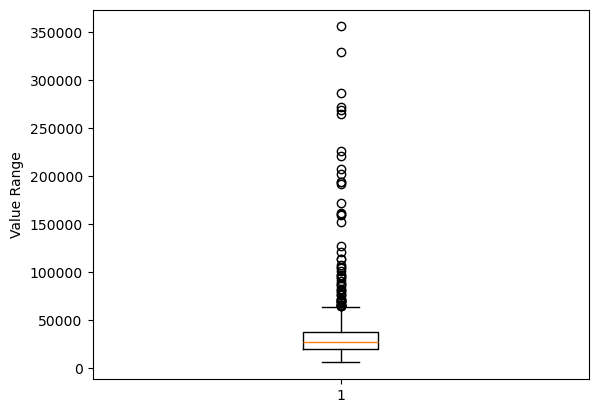

In [18]:
import matplotlib.pyplot as plt

plt.boxplot(sales_df["daily_sales"])

plt.ylabel("Value Range")
plt.show()

##### The histogram confirms a right-skewed distribution with a long upper tail.


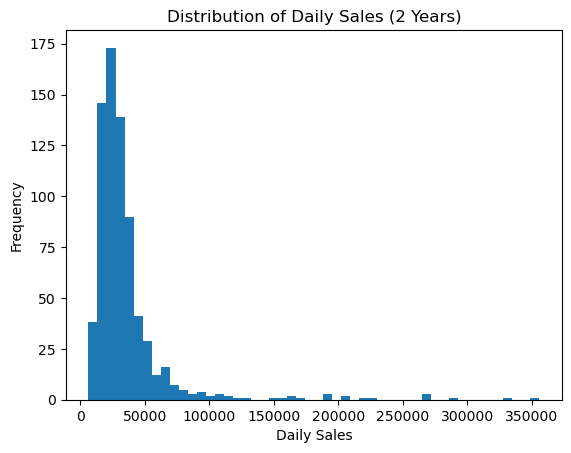

In [17]:
plt.hist(sales_df["daily_sales"], bins=50)
plt.xlabel("Daily Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Sales (2 Years)")
plt.show()

## Interpretation

** Due to the skewed and outlier data, the median sales figure will not be distorted.
The mean is inflated by extreme sales days and does not represent a typical sales day.  


** Outliers should not be ignored. may represent unique business events, major clients, or 
data errors that require separate investigation

** Most days are low-to-moderate sales.
Few days generate very high revenue

** Inconsistent sales and a wide range of outcomes

## Business Recommendations

(1) Use median for monthly targets and performance evaluation to avoid overestimating typical sales

(2) Use the coefficient of variation, which helps compare volatility across months regardless of scale
Used for risk-adjusted planning

(3) Ensuring sufficient inventory to handle occasional massive spikes

(4) Implement Dynamic Pricing & Marketing 